In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/sccube/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
sc_adata = sc.read_h5ad('demo_data/customized_bc_adata.h5ad')

In [4]:
sc_adata.obs['Cell_type'].value_counts()

Endothelial              816
Cancer/Epithelial        681
T-cells                  476
CAFs                     359
PVL cells                302
Myoepithelial            206
Monocytes/Macrophages    105
B-cells                   36
Plasmablasts              19
Name: Cell_type, dtype: int64

In [5]:
CustomGenerator = SPatternGeneratorCustom(
    sc_adata=sc_adata,
    cell_num=5000, 
    celltype_key='Cell_type',
    set_seed=True, 
    seed=12345, 
    spatial_size=50, 
    select_celltype=['T-cells', 'Endothelial', 'Cancer/Epithelial', 'CAFs'], )

generating structured immune ring spatial patterns...
no `background_prop` is provided, each background cell type follows an equal proportion...


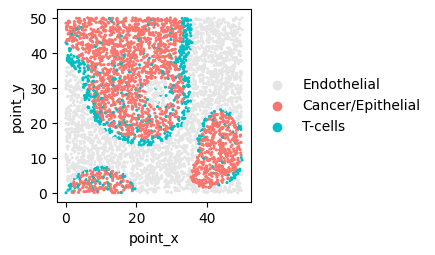

In [6]:
shape_list = ['Oval', 'Oval', 'Oval', 'Circle', 'Circle', 'Oval', 'Oval', 'Circle']
ring_celltype_list=[['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Endothelial', 'Endothelial'], 
                    ['Endothelial', 'Endothelial'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells']]
ring_purity_list = [0.85, 0.95, 0.95, 1, 0.9, 1, 0.95, 0.8]
infiltration_celltype_list = [['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells']]
infiltration_prop_list = [[1], [1], [1], [1], [1], [1], [1], [1]]
background_celltype = ['Endothelial']
background_prop = None
center_x_list=[20, 15, 22, 26, 26, 42, 44, 10]
center_y_list=[30, 50, 50, 30, 28, 8, 13, -3]
ring_width_list=[[2], [3], [1.5], [0], [0], [0], [0.8], [0.5]]
a_list=[15, 16, 10, 3, 3.5, 8, 10, 10]
b_list=[13, 20, 8, 3, 3.5, 5, 6, 10]
theta_list=[np.pi / 1.5, np.pi / 4, np.pi / 4, np.pi / 4, np.pi / 4, np.pi / 4, np.pi / 2, np.pi / 2]

meta_new = CustomGenerator.simulate_ring(
    shape_list=shape_list,
    ring_celltype_list=ring_celltype_list,
    ring_purity_list=ring_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    ring_width_list=ring_width_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=[ "#E5E5E5", "#F8766D", "#00BFC4"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

generating structured cluster spatial patterns...
no `background_prop` is provided, each background cell type follows an equal proportion...


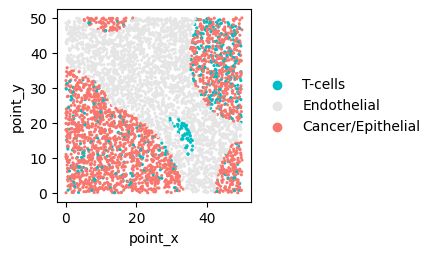

In [7]:
shape_list = ['Oval', 'Circle', 'Irregular', 'Oval', 'Oval', 'Circle']
cluster_purity_list = [0.9, 0.9, None, 0.7, 0.9, 0.9]
cluster_celltype_list = ['Cancer/Epithelial', 'Cancer/Epithelial', 'T-cells', 'Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial']
infiltration_celltype_list = [['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells'], ['T-cells']]
infiltration_prop_list = [[1], [1], [1], [1], [1], [1]]
background_celltype = ['Endothelial']
background_prop = None
center_x_list = [-8, 2, 35, 50, 50, 12]
center_y_list = [25, -5, 10, 40, -5, 55]
a_list = [20, 32, 20, 20, 20, 9]
b_list = [12, 32, 15, 15, 8, 9]
theta_list = [np.pi / 1, np.pi / 10, np.pi / 1.5, np.pi / 2, np.pi / 2, np.pi / 4]
scale_value_list = [4, 4, 4, 4, 4, 4]
twist_value_list=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

meta_new = CustomGenerator.simulate_cluster(
    shape_list=shape_list,
    cluster_purity_list=cluster_purity_list,
    cluster_celltype_list=cluster_celltype_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,
    scale_value_list=scale_value_list,
    twist_value_list=twist_value_list)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=["#00BFC4", "#E5E5E5", "#F8766D"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()